In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Simulate counterexamples for Problem 1

In [2]:
def simulate(ntrys=10000, ret=True):
    ct = 0
    for n in range(ntrys):
        y = np.random.choice([-1, 1], size=(4,1))
        X = 50 * np.random.random_sample(size=(4,2))
        D = np.multiply(y @ y.T, X @ X.T)

        vals = np.linalg.eigvals(D)
        if np.any(vals <= 0): 
            ct += 1
            if ret: return y, X
    return ct

In [3]:
simulate(ret=False) 
#on average, 75% of the time there's a negative eigenvalue---but it's really small

7747

In [4]:
y, X = simulate()
D = np.multiply(y @ y.T, X @ X.T)
v, Q = np.linalg.eig(D)
np.abs(D - Q @ np.diag(v) @ Q.T < 1e-14)

array([[ True,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False],
       [False, False, False,  True]])

In [5]:
v

array([ 8.88246724e+03,  2.74768226e+02,  7.10814844e-15, -1.70285176e-13])

## Play with star data for Problem 4

In [2]:
raw = np.loadtxt('stardata.txt', delimiter='\t')
X = raw[:,:2]
y = raw[:,2]
#plt.scatter(X[:,0], X[:,1], c=y)
#plt.show()

In [41]:
def mapping(X):
    """ 
        Nonlinear mapping to 2D or 3D feature space 
        This is what you have to design
    """
    rho = np.sqrt(X[:,0]**2 + X[:,1]**2).reshape(-1, 1)
    pol = np.arctan2(X[:,1], X[:,0]).reshape(-1, 1) - rho
    return np.hstack((np.sin(3*pol), np.cos(3*pol)))

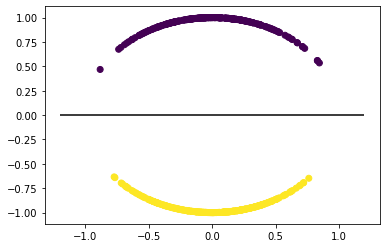

In [47]:
#2d version
%matplotlib inline 

mappedX = mapping(X)
plt.scatter(mappedX[:,0], mappedX[:,1], c=y)
plt.hlines(0, -1.2, 1.2)
plt.savefig('feature-space.png')
plt.show()

In [59]:
#3d version
%matplotlib notebook

mappedX = mapping(X)
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(mappedX[:,0], mappedX[:,1], mappedX[:,2], c=y)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …